In [1]:
from __future__ import print_function

import math
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12, 'lines.linewidth': 2})
%matplotlib notebook

In [3]:
def f(x, y):
    """The function f(x, y)."""
    return x * y ** 4.0 + 2.0 * x ** 2.0 * y ** 3.0 - 12.0 * y ** 2.0

def f_Y(x, y):
    """The partial derivative of f w.r.t. y."""
    return 4.0 * x * y ** 3.0 + 6.0 * x ** 2.0 * y ** 2.0 - 24.0 * y

def f_YY(x, y):
    """The second partial derivative of f w.r.t. y."""
    return 12.0 * x * y ** 2.0 + 12.0 * x ** 2.0 * y - 24.0

def f_XY(x, y):
    """The second partial derivative of f w.r.t. x and y."""
    return 4.0 * y ** 3.0 + 12.0 * x * y ** 2.0

In [4]:
def g(x):
    """The set of solutions for argmin_y f(x, y) evaluated as the zeros of
    the function f_Y(x, y)."""

    y_star = { 0.0 }

    a = 4.0 * x
    b = 6.0 * x ** 2.0
    c = -24.0
    delta = b ** 2.0 - 4.0 * a * c
    if (delta >= 0.0):
        delta = math.sqrt(delta)
        y_star.add((-b - delta) / (2.0 * a))
        y_star.add((-b + delta) / (2.0 * a))

    return y_star

def dg(x):
    """The gradient around each solution point return as a part (y^\star, g')."""
    dgdx = set()
    y_star = g(x)
    for y in y_star:
        dgdx.add((y, -1.0 * f_XY(x, y) / f_YY(x, y)))

    return dgdx

In [5]:
x_min, x_max = 0.5, 2.5
y_min, y_max = -5.0, 4.0
X, Y = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.empty(X.shape)

for u in range(Z.shape[0]):
    for v in range(Z.shape[1]):
        Z[u, v] = f(X[u, v], Y[u, v])

<IPython.core.display.Javascript object>


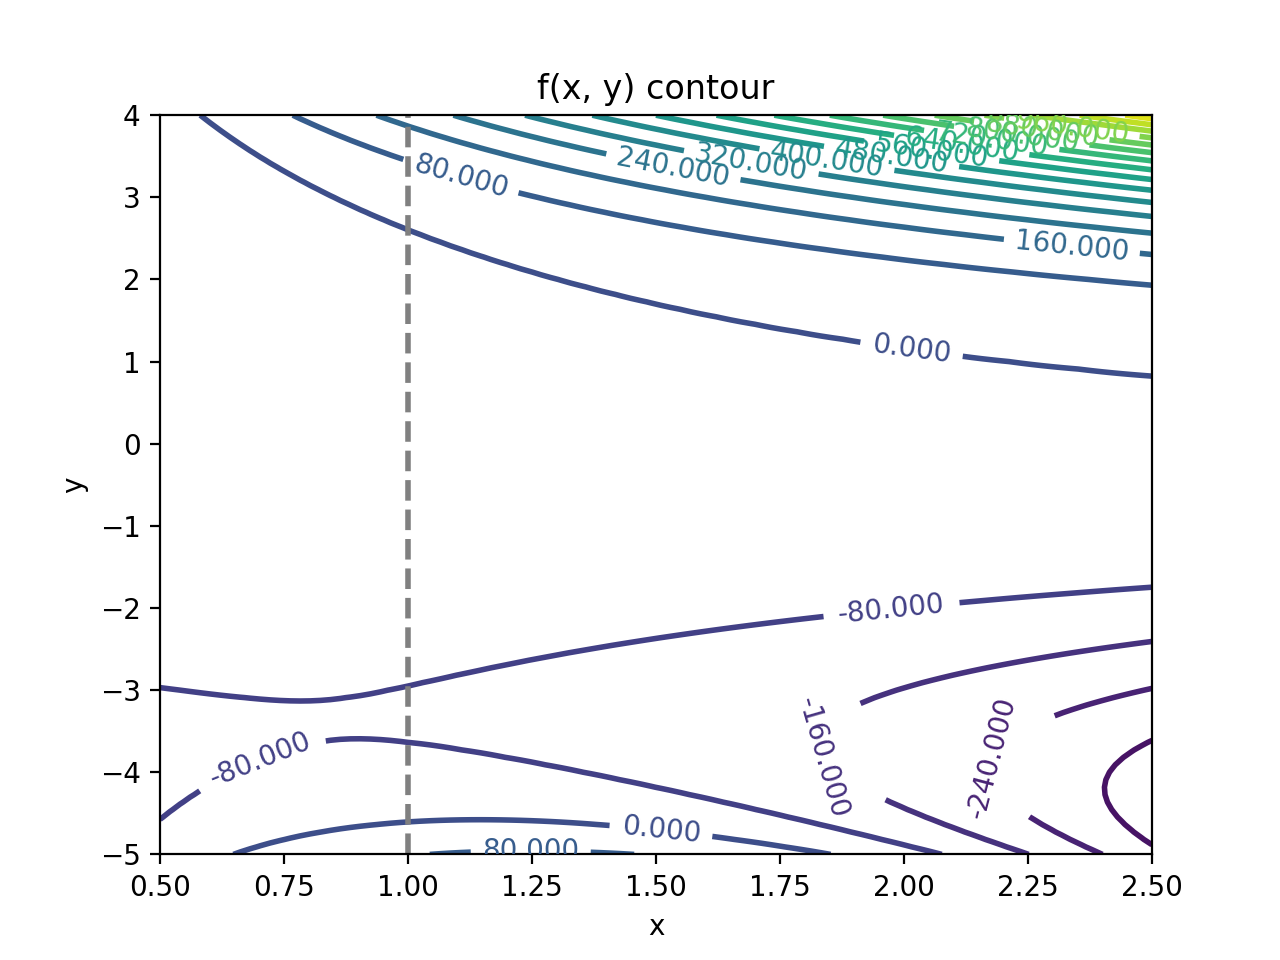

Text(0, 0.5, 'y')

In [6]:
plt.figure()
cs = plt.contour(X, Y, Z, 20)
plt.clabel(cs, inline=1, fontsize=10)
plt.plot([1.0, 1.0], [y_min, y_max], color='gray', linestyle='dashed')
plt.title('f(x, y) contour')
plt.xlabel('x'); plt.ylabel('y')

<IPython.core.display.Javascript object>


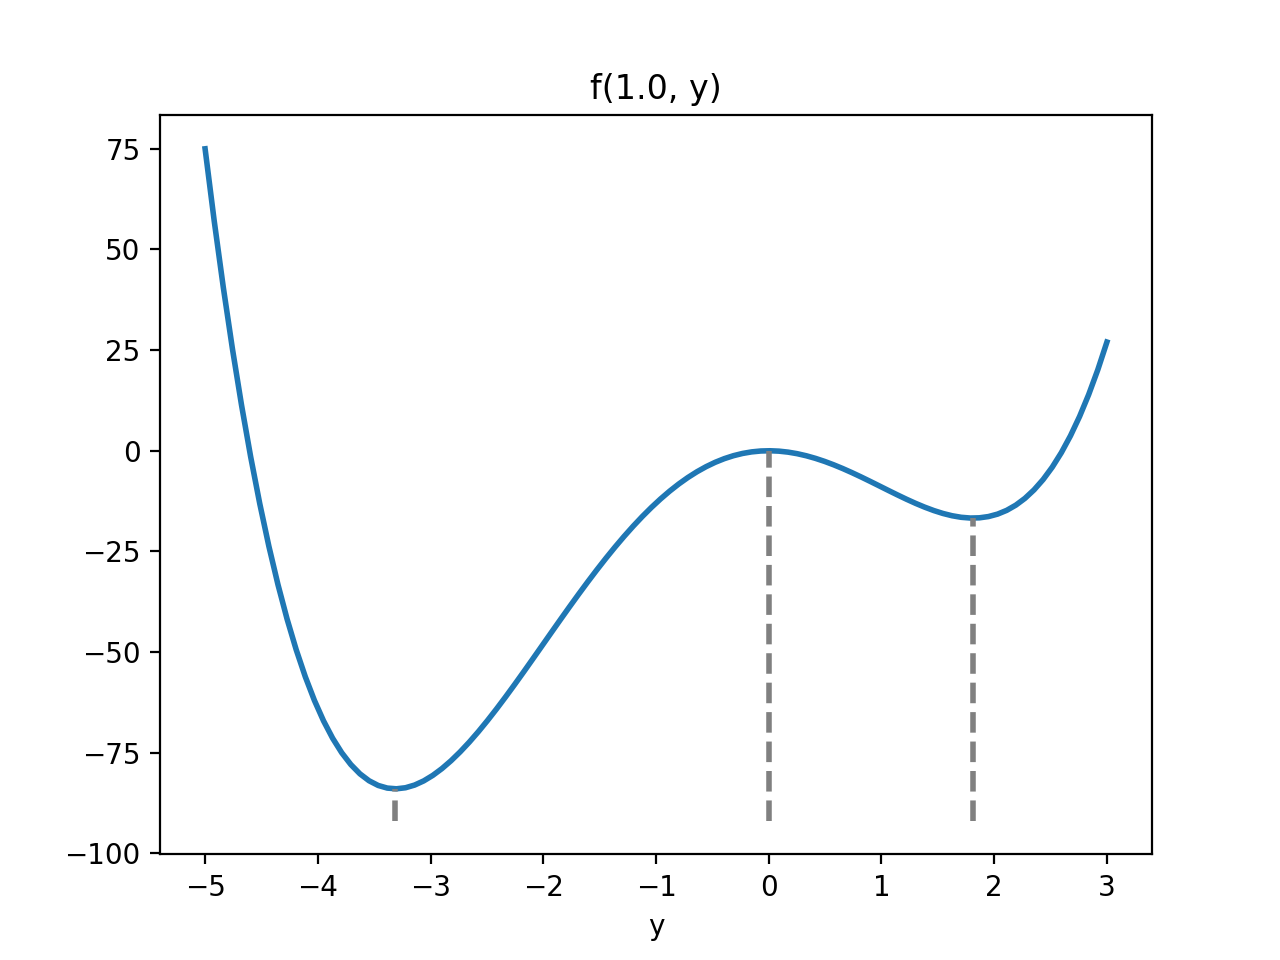

Text(0.5, 0, 'y')

In [8]:
X = 1.0
y_star = g(X)
y_min = math.floor(min(y_star) - 1.0)
y_max = math.ceil(max(y_star) + 1.0)
Y = np.linspace(y_min, y_max, 100)
Z = np.empty(Y.shape)
for u in range(Y.size):
    Z[u] = f(X, Y[u])

plt.figure()
plt.plot(Y, Z)
z_min = plt.gca().get_ylim()[0]
for y in y_star:
    plt.plot([y, y], [z_min, f(X, y)], color='gray', linestyle='dashed')
plt.title("f({}, y)".format(X)); plt.xlabel('y')

<IPython.core.display.Javascript object>


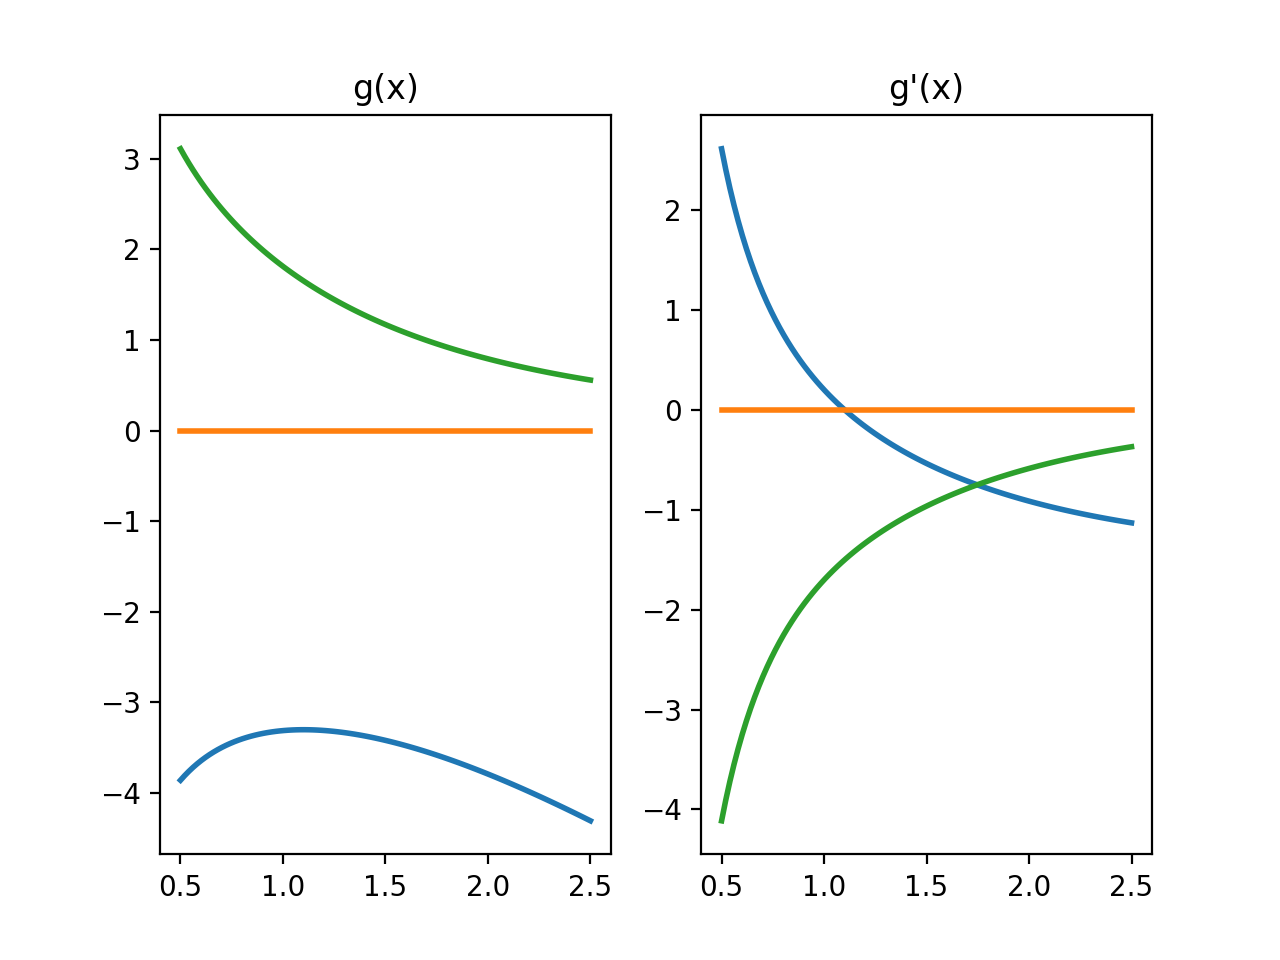

Text(0.5, 1.0, "g'(x)")

In [7]:
X = np.linspace(x_min, x_max, 100)
Z = np.empty((100, 3))
dZ = np.empty((100, 3))
for u in range(X.size):
    Z[u, :] = np.array(sorted(list(g(X[u]))))
    dZ[u, 0] = -1.0 * f_XY(X[u], Z[u, 0]) / f_YY(X[u], Z[u, 0])
    dZ[u, 1] = -1.0 * f_XY(X[u], Z[u, 1]) / f_YY(X[u], Z[u, 1])
    dZ[u, 2] = -1.0 * f_XY(X[u], Z[u, 2]) / f_YY(X[u], Z[u, 2])

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(X, Z)
plt.title("g(x)")
plt.subplot(1, 2, 2)
plt.plot(X, dZ)
plt.title("g'(x)")